In [4]:
import numpy as np
from tqdm import tqdm
import cvxpy as cp
import matplotlib.pyplot as plt

from src.mpc import Controller, Dimension
import src.terminal_set as terminal_set
from src.visualise import (
    plot_3d_control,
    plot_action_history,
    plot_state_history,
    plot_terminal_cost_lyupanov,
    plot_disturbance,
)
from main import simulate

Initial state is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Target state to reach is  [1. 0. 0.]
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-18


Simulating: 100%|██████████| 100/100 [00:03<00:00, 29.24it/s]
/Users/andrei-carlo/Documents/uni/sc4232312_mpc/mpc_drone/visualise.py:32: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(x_init[1], y_target[1])
/Users/andrei-carlo/Documents/uni/sc4232312_mpc/mpc_drone/visualise.py:33: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim(x_init[2], y_target[2])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


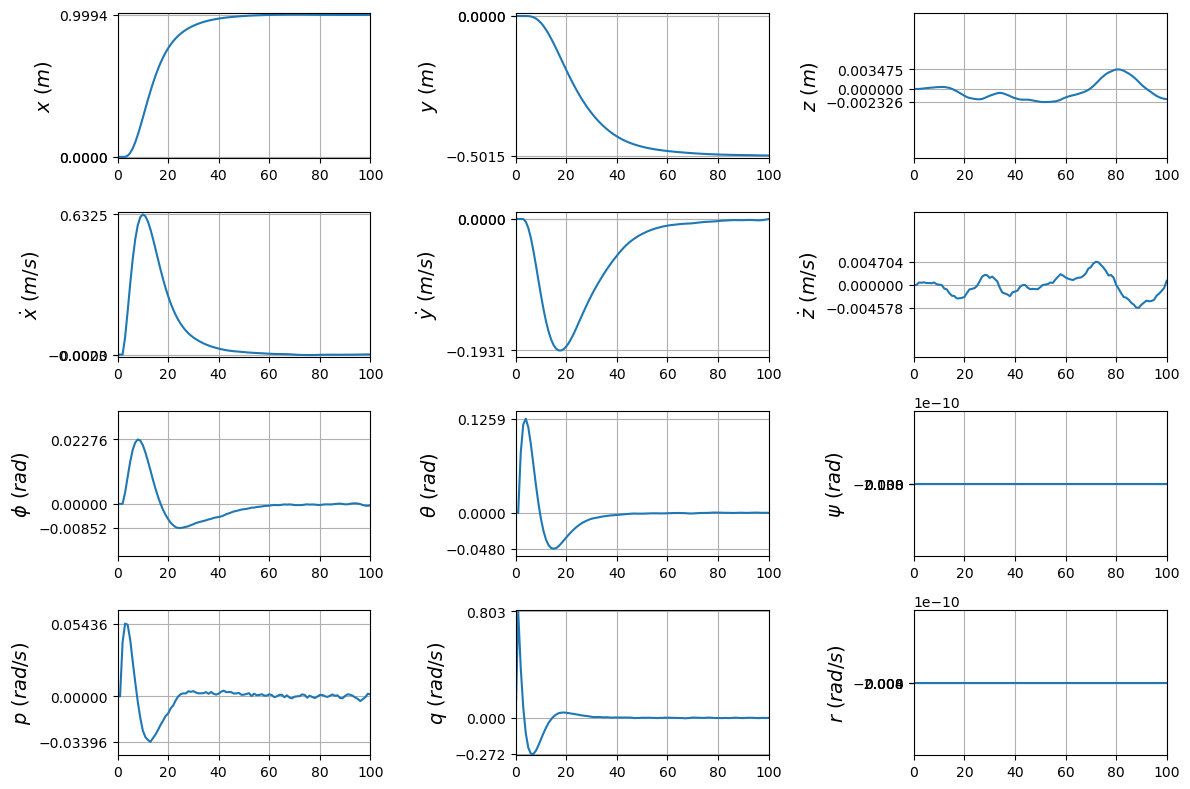

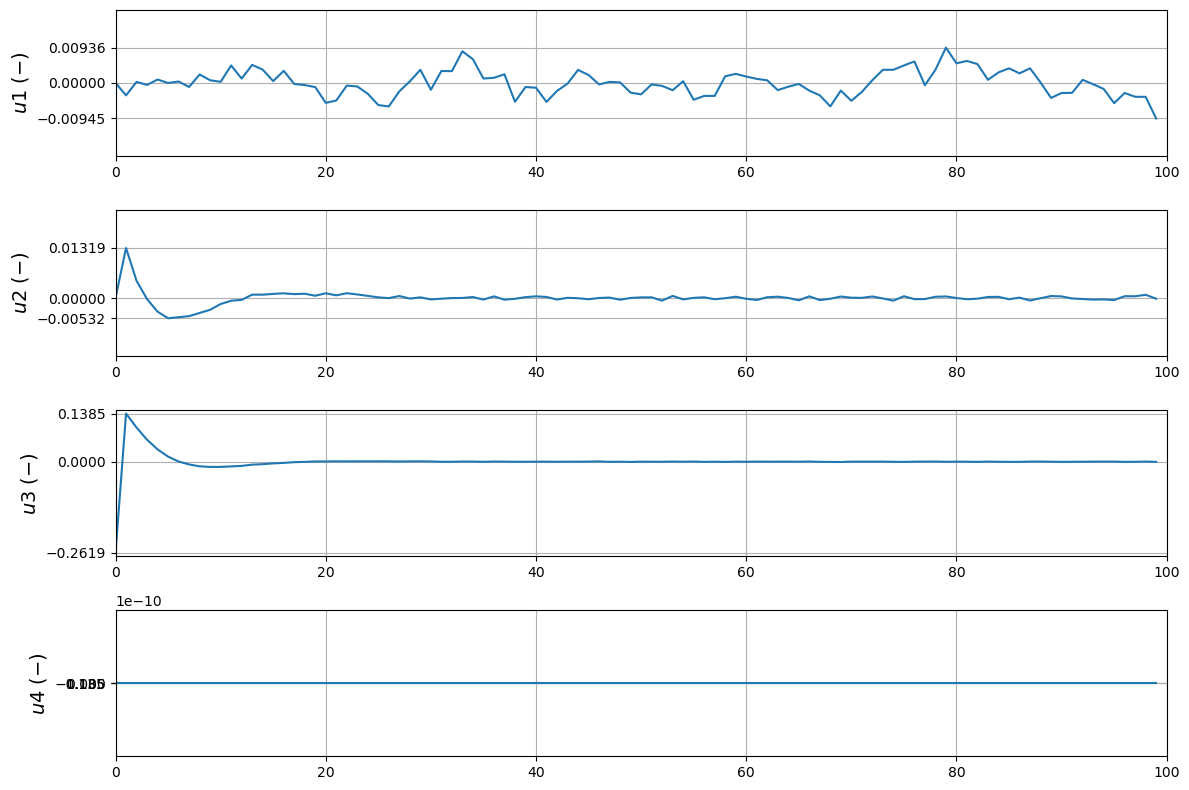

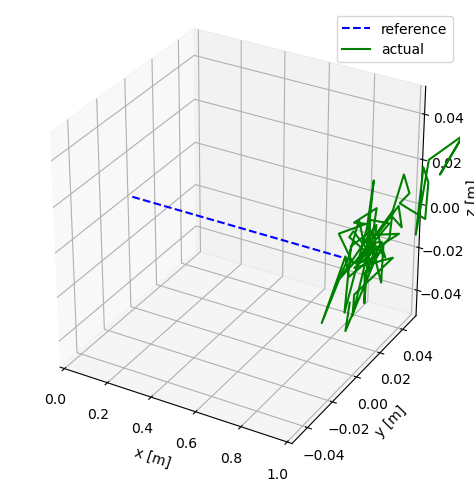

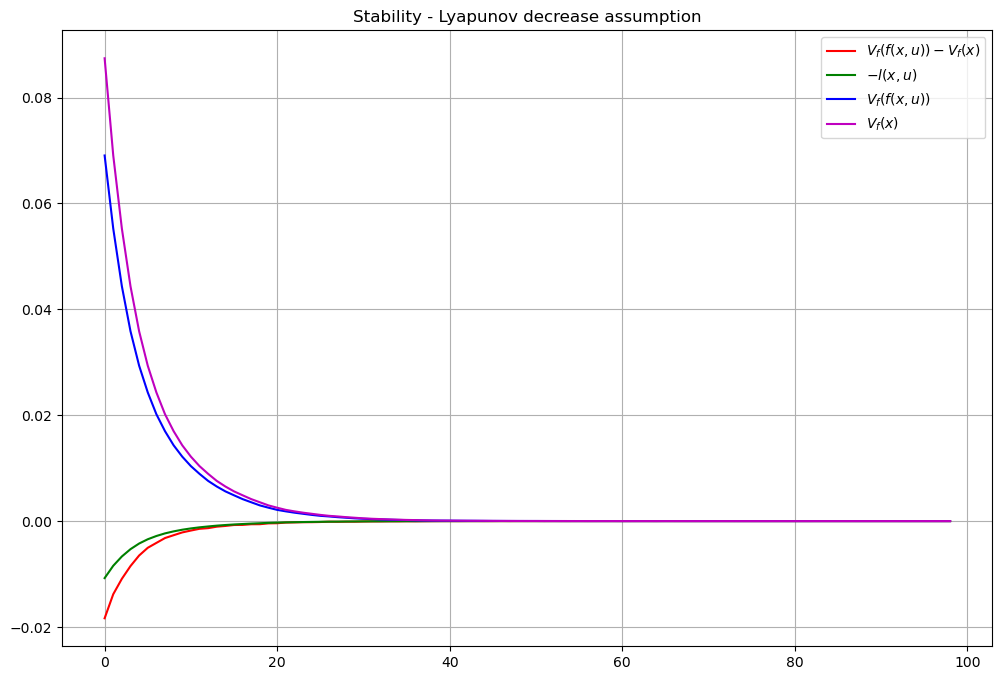

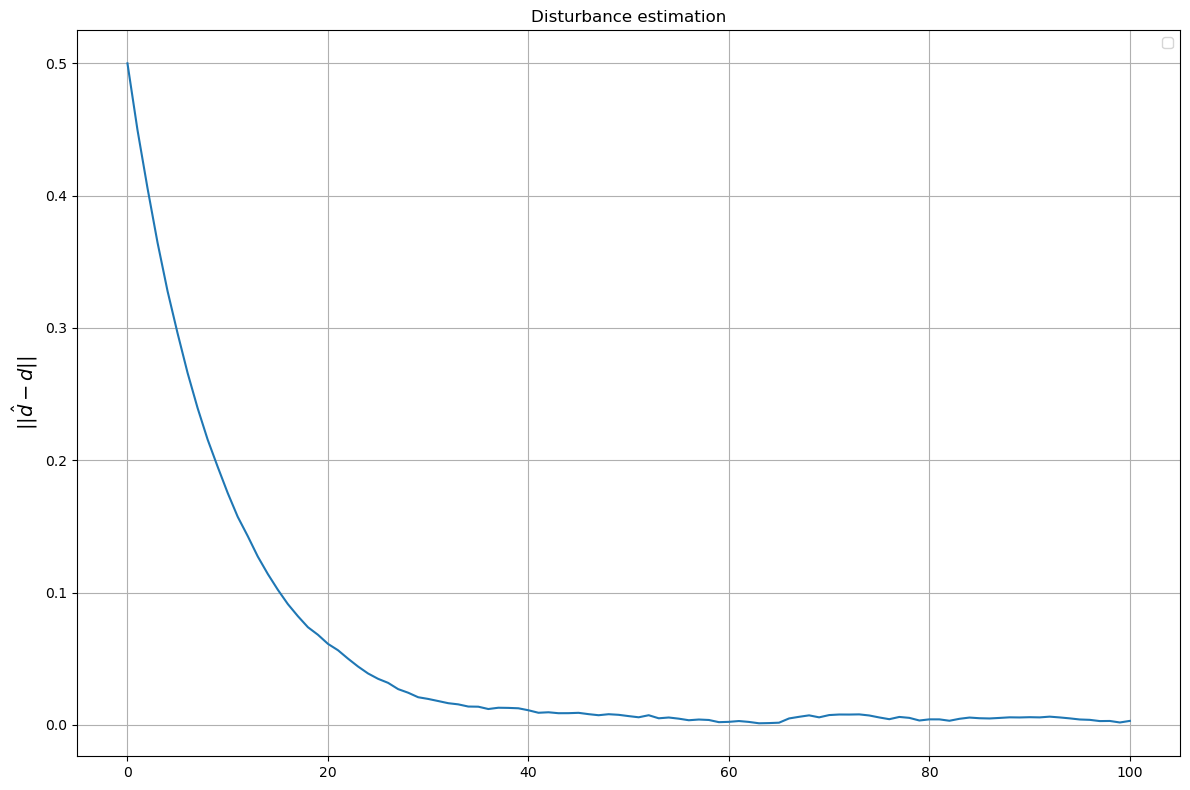

In [5]:
dt = 0.10  # Sampling period
N = 20  # MPC Horizon
T = 100  # Duration of simulation
dim = Dimension(nx=12, nu=4, ny=3, nd=3)

x_init = np.zeros(dim.nx)  # Initial conditions
y_target = np.zeros(dim.ny)  # State to reach
y_target[0:3] = np.array([1.0, 0.0, 0.0])
# y_target[3:6] = np.array([0.0, 0.0, 0.0])

print("Initial state is ", x_init)
print("Target state to reach is ", y_target)

# Controller
ctrl = Controller(
    dim=dim,
    mpc_horizon=N,
    timestep_mpc_stages=dt,
    solver=cp.GUROBI,
    control_type="mpc",  # 'lqr' or 'mpc'
)

# Set disturbance and terminal cost scaling
ctrl.d = np.array([0.0, 0.5, 0.0])
ctrl.beta = 2.0  # << (very small) beta means you get a behaviour as if tcost was not there at all

states, inputs, plans, Vf, l, outputs, disturbance_est = simulate(
    controller=ctrl,
    x_init=x_init,
    y_target=y_target,
    T=T,
    use_terminal_set=False,
    plot=True,
    plots_suffix="_disturbance",
)